Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

Since there are two data sets train and test, we will be working simultaneously on them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
agritrain=pd.read_csv('agritrain.csv')

In [3]:
agritrain=pd.DataFrame(agritrain)

In [4]:
agritest=pd.read_excel('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/test_agriculture.xlsx?raw=true')

In [5]:
agritest=pd.DataFrame(agritest)

In [6]:
agritrain

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [7]:
agritest

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [8]:
agritrain.drop('ID',axis=1,inplace=True)
agritest.drop('ID',axis=1,inplace=True)

In [9]:
agritrain.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [10]:
agritest.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [11]:
import seaborn as sb

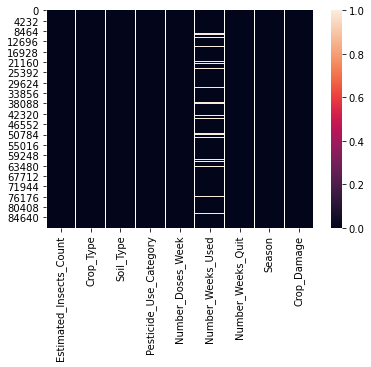

In [12]:
sb.heatmap(agritrain.isnull())

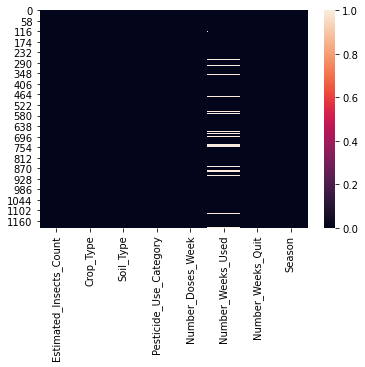

In [13]:
sb.heatmap(agritest.isnull())

In [14]:
agritrain.dropna(inplace=True)

In [15]:
agritest.dropna(inplace=True)

In [16]:
agritrain.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [17]:
agritest.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [18]:
agritrain.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [19]:
agritrain['Estimated_Insects_Count'].value_counts()

1212    3064
1478    3035
1132    3015
1385    2973
1056    2936
        ... 
3896     127
3515     115
4097     100
231       83
169       57
Name: Estimated_Insects_Count, Length: 71, dtype: int64

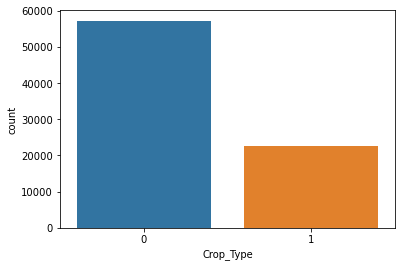

In [20]:
sb.countplot(agritrain['Crop_Type'])

More crops belong to the category of Crop Type 0

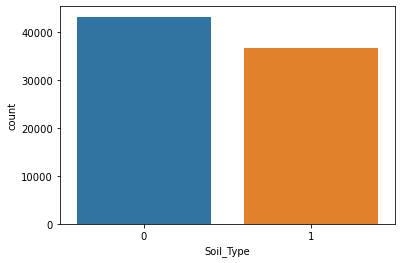

In [21]:
sb.countplot(agritrain['Soil_Type'])

There are two soil types and data has almost 50% of each

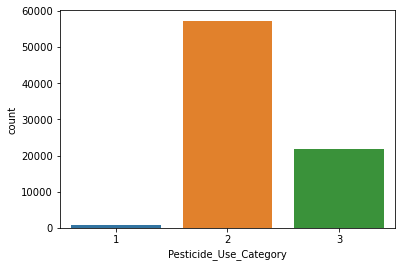

In [22]:
sb.countplot(agritrain['Pesticide_Use_Category'])

Pesticides 2 is mostly used on the crops while least used is pesticides 1

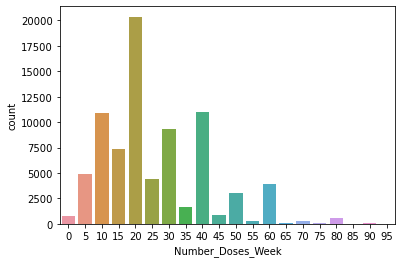

In [23]:
sb.countplot(agritrain['Number_Doses_Week'])

Most of the crops are given pesticides doses of 20 per week and very few crops are given doses till of 90 per week.

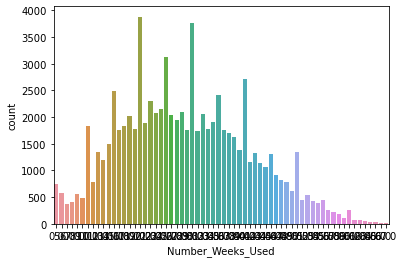

In [103]:
sb.countplot(agritrain['Number_Weeks_Used'])

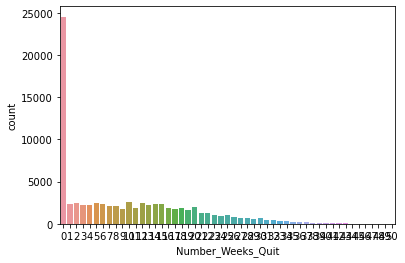

In [104]:
sb.countplot(agritrain['Number_Weeks_Quit'])

There was a continuos dose of pesticides in most crops

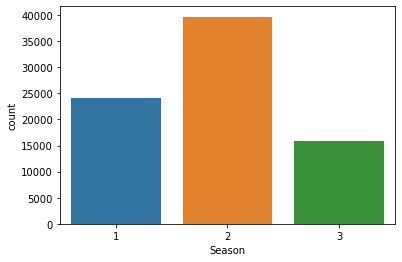

In [26]:
sb.countplot(agritrain['Season'])

Most of the crops are harvested in Season 2

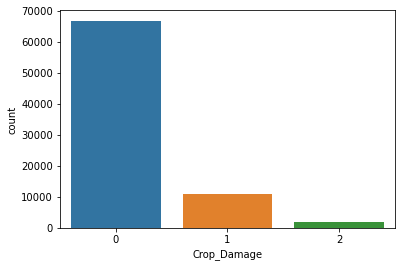

In [27]:
sb.countplot(agritrain['Crop_Damage'])

Most of the crops are alive the damage is caused by 2 which is other factors and very less are damaged by pesticides.

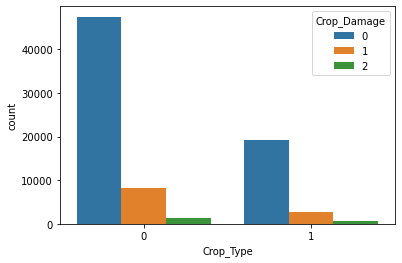

In [28]:
sb.countplot(x='Crop_Type',hue='Crop_Damage',data=agritrain)

Crop 0 has the most survival.

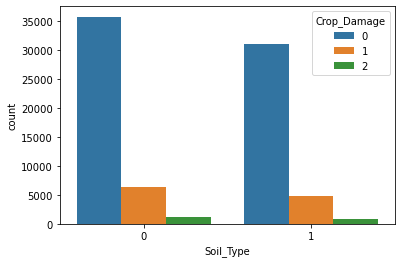

In [29]:
sb.countplot(x='Soil_Type',hue='Crop_Damage',data=agritrain)

Soil type 1 and 2 show almost same behaviour on crop damage.

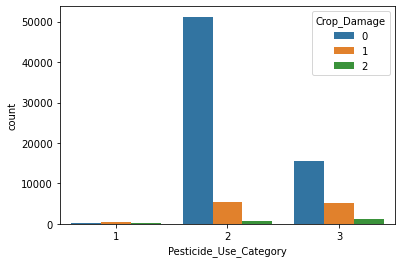

In [30]:
sb.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=agritrain)

Pesticide 1 has higher other damage than survival
Pesticide 2 has least damage by pesticides and most survival rate

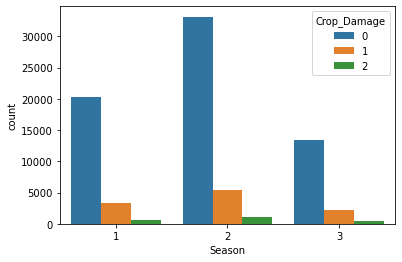

In [31]:
sb.countplot(x='Season',hue='Crop_Damage',data=agritrain)

Season 3 has least pesticide damage and sesaon 2 has highest the highest survival rate of crop.

In [32]:
at=agritrain.head(1000)

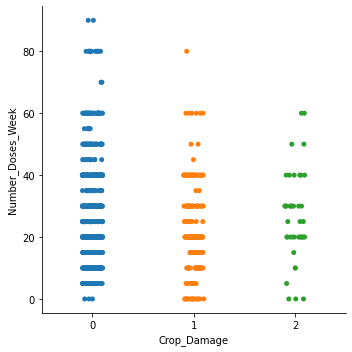

In [108]:
sb.catplot(x='Crop_Damage',y='Number_Doses_Week',data=at)

Survival is better if the dosage is given 10-50 doses in a week. While pesticides damage is more in 20 doses a week.

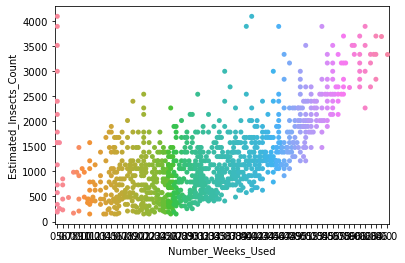

In [110]:
sb.swarmplot(x='Number_Weeks_Used',y='Estimated_Insects_Count',data=at)

Insect count is high when pesticides are used less and as there is an increase the insects counts is less

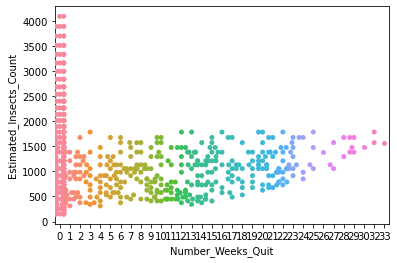

In [113]:
sb.swarmplot(x='Number_Weeks_Quit',y='Estimated_Insects_Count',data=at)

In 0 or 1 weeks quit there are more insects and as they increase the insects count decreases

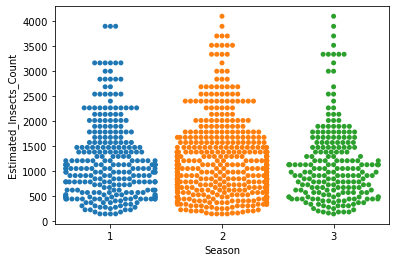

In [36]:
sb.swarmplot(x='Season',y='Estimated_Insects_Count',data=at)

There are more insects in sesaon 2

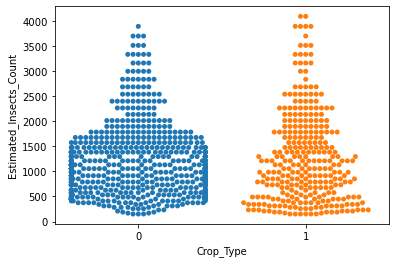

In [37]:
sb.swarmplot(x='Crop_Type',y='Estimated_Insects_Count',data=at)

There are more insects in crop 0

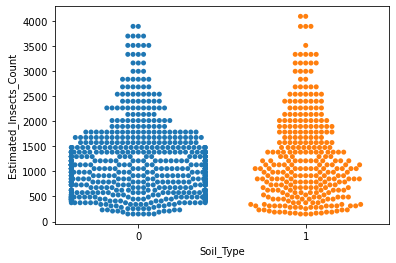

In [38]:
sb.swarmplot(x='Soil_Type',y='Estimated_Insects_Count',data=at)

More insects easily breed in soil type 0

In [39]:
agritrain.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.089200,-0.055865,-0.079957,-0.100534,0.434925,0.298572,0.002945,0.203796
Crop_Type,-0.089200,1.000000,-0.287192,0.238826,-0.192361,-0.043991,-0.235203,0.001871,-0.017097
Soil_Type,-0.055865,-0.287192,1.000000,0.030115,0.080182,-0.070051,0.011770,0.002367,-0.024569
Pesticide_Use_Category,-0.079957,0.238826,0.030115,1.000000,-0.005010,0.344131,-0.555415,0.002090,0.176552
Number_Doses_Week,-0.100534,-0.192361,0.080182,-0.005010,1.000000,0.126426,-0.036300,-0.000493,-0.030967
Number_Weeks_Used,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.232192
Number_Weeks_Quit,0.298572,-0.235203,0.011770,-0.555415,-0.036300,-0.449007,1.000000,0.001274,-0.133116
Season,0.002945,0.001871,0.002367,0.002090,-0.000493,0.004417,0.001274,1.000000,0.000634
Crop_Damage,0.203796,-0.017097,-0.024569,0.176552,-0.030967,0.232192,-0.133116,0.000634,1.000000


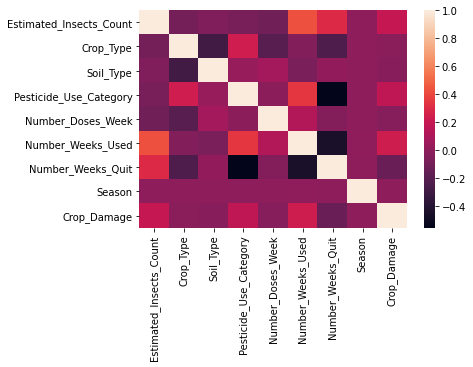

In [40]:
sb.heatmap(agritrain.corr())

Co relation shows Crop type is negatively co related to soil type number_does_week and number_weeks_quit

# CHECKING OUTLIERS

Estimated_Insects_Count        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Crop_Type                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Soil_Type                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Pesticide_Use_Category      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Number_Doses_Week             AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number_Weeks_Used          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number_Weeks_Quit          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Season                     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Crop_Damage                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

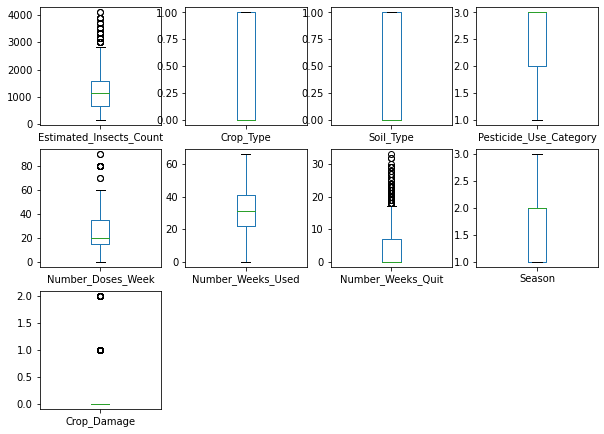

In [41]:
at.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

In [42]:
agritrain.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [43]:
import scipy
from scipy import stats
from scipy.stats import zscore

In [44]:
z=np.abs(zscore(agritrain))

In [45]:
threshold=3
print(np.where(z>3))

(array([    5,     7,    11, ..., 79739, 79752, 79853], dtype=int64), array([8, 8, 8, ..., 4, 8, 6], dtype=int64))


In [46]:
agri_train=agritrain[(z<3).all(axis=1)]

In [47]:
print(agritrain.shape)
print(agri_train.shape)

(79858, 9)
(76324, 9)


# Checking Skewness

In [48]:
agri_train.skew()

Estimated_Insects_Count    0.802834
Crop_Type                  0.941813
Soil_Type                  0.161366
Pesticide_Use_Category     0.851758
Number_Doses_Week          0.749105
Number_Weeks_Used          0.266450
Number_Weeks_Quit          0.792810
Season                     0.146828
Crop_Damage                2.062771
dtype: float64

In [49]:
x=agri_train.drop('Crop_Damage',axis=1)
y=agri_train['Crop_Damage'].values.reshape(-1,1)

In [101]:
import sklearn
from sklearn.preprocessing import label_binarize
y=label_binarize(y,classes= [0,1,2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9F31BCAC0>,
      dtype=object)

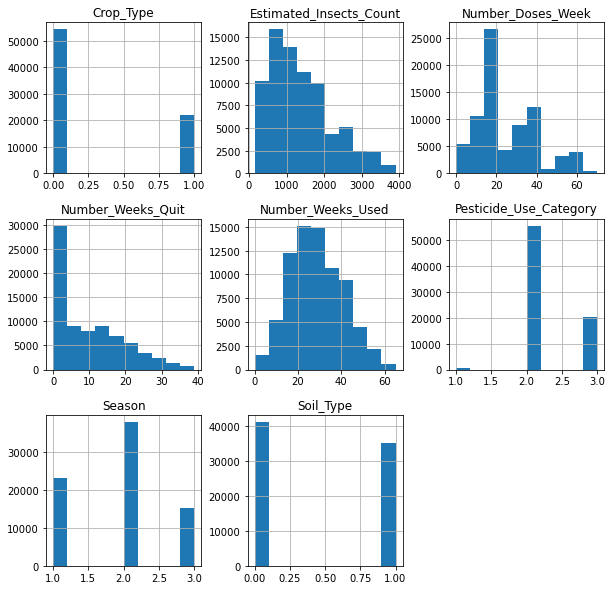

In [50]:
x.hist(figsize=(10,10))

In [51]:
import warnings 
warnings.filterwarnings('ignore')
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [52]:
x.skew()

Estimated_Insects_Count   -0.496729
Crop_Type                  0.941813
Soil_Type                  0.161366
Pesticide_Use_Category     0.613683
Number_Doses_Week         -1.043097
Number_Weeks_Used          0.266450
Number_Weeks_Quit         -0.283788
Season                     0.146828
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9F81332E0>,
      dtype=object)

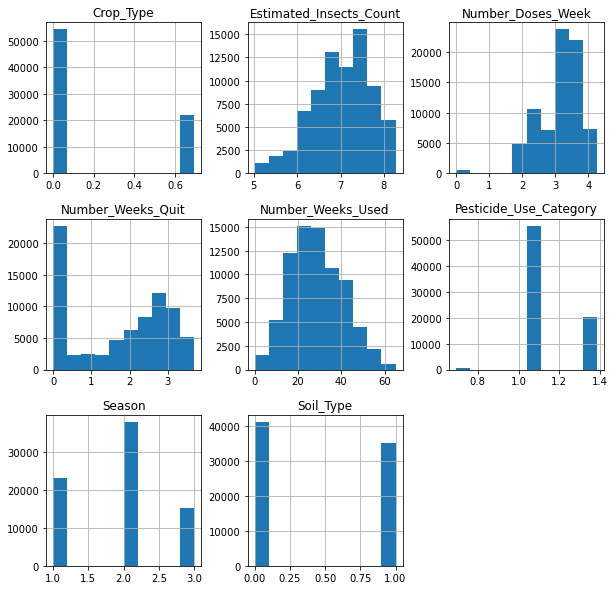

In [53]:
x.hist(figsize=(10,10))

In [54]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,5.241747,0.693147,0,0.693147,0.000000,0.0,0.000000,1
1,5.347108,0.693147,0,0.693147,0.000000,0.0,0.000000,2
2,5.552960,0.693147,0,0.693147,0.000000,0.0,0.000000,2
3,5.552960,0.693147,1,0.693147,0.000000,0.0,0.000000,2
4,5.837730,0.693147,0,0.693147,0.000000,0.0,0.000000,2
...,...,...,...,...,...,...,...,...
88852,8.060224,0.693147,0,1.098612,4.110874,44.0,2.772589,2
88854,8.165364,0.693147,0,1.098612,2.397895,20.0,3.663562,1
88855,8.165364,0.693147,0,1.098612,2.772589,40.0,2.197225,2
88856,8.216899,0.693147,0,1.098612,2.397895,25.0,2.944439,3


In [55]:
x.dtypes

Estimated_Insects_Count    float64
Crop_Type                  float64
Soil_Type                    int64
Pesticide_Use_Category     float64
Number_Doses_Week          float64
Number_Weeks_Used          float64
Number_Weeks_Quit          float64
Season                       int64
dtype: object

In [56]:
y.shape

(76324, 1)

# Normalizing the data more

In [57]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=pd.DataFrame(s.fit_transform(x))

In [69]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [70]:
def acc(cls,x,y):
    max_ac_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        cls.fit(x_train,y_train)
        pred=cls.predict(x_test)
        ac=accuracy_score(pred,y_test)
        print('Accuracy Score Is',ac,'At Random State',r_state)
        
        if ac>max_ac_score:
            max_ac_score=ac
            final_r_state=r_state
            
    print('\n')
    print('Max Accuracy Score is',max_ac_score,'At Random State',final_r_state)
    return final_r_state
    

In [89]:
g=GaussianNB()
r_state=acc(g,x,y)

Accuracy Score Is 0.8390435637078284 At Random State 42
Accuracy Score Is 0.8353095316082542 At Random State 43
Accuracy Score Is 0.8472322305928595 At Random State 44
Accuracy Score Is 0.8406812970848346 At Random State 45
Accuracy Score Is 0.8386505076973468 At Random State 46
Accuracy Score Is 0.8411398624303963 At Random State 47
Accuracy Score Is 0.8400262037340321 At Random State 48
Accuracy Score Is 0.8408778250900754 At Random State 49
Accuracy Score Is 0.8415984277759581 At Random State 50
Accuracy Score Is 0.8415984277759581 At Random State 51
Accuracy Score Is 0.840812315754995 At Random State 52
Accuracy Score Is 0.8451359318702916 At Random State 53
Accuracy Score Is 0.8407468064199148 At Random State 54
Accuracy Score Is 0.8420569931215198 At Random State 55
Accuracy Score Is 0.8452014412053718 At Random State 56
Accuracy Score Is 0.8427120864723223 At Random State 57
Accuracy Score Is 0.8420569931215198 At Random State 58
Accuracy Score Is 0.8390435637078284 At Random St

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44,test_size=0.20)

In [77]:
def g(cls):
    g=GridSearchCV(cls,parameters,cv=10)
    g.fit(x_train,y_train)
    g.best_params_
    return g.best_params_

In [78]:
dt=DecisionTreeClassifier()
parameters={'criterion':['entropy','gini']}
g(dt)

{'criterion': 'entropy'}

In [80]:
knr=KNeighborsClassifier()
parameters={'n_neighbors': range(1,11)}
g(knr)

{'n_neighbors': 10}

In [88]:
dtc=DecisionTreeClassifier(criterion='entropy')
knc=KNeighborsClassifier(n_neighbors=10)

In [90]:
model=[]
cvscore=[]
acscore=[]

M=[g,dtc,knc]

for m in M:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44,test_size=0.20)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('**********',m,'************')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score is',acc)
    acscore.append(acc)
    
    c=cross_val_score(m,x,y,scoring='accuracy',cv=10).mean()
    print('Cross Value Score is',c)
    cvscore.append(c)
    
    cm=confusion_matrix(pred,y_test)
    print(cm)
    
    print('\n')
    
    
    

********** GaussianNB() ************
Accuracy Score is 0.8472322305928595
Cross Value Score is 0.8417535724281169
[[12322  1547]
 [  785   611]]


********** DecisionTreeClassifier(criterion='entropy') ************
Accuracy Score is 0.7897150343924009
Cross Value Score is 0.7882973591167779
[[11406  1509]
 [ 1701   649]]


********** KNeighborsClassifier(n_neighbors=10) ************
Accuracy Score is 0.8633475270226008
Cross Value Score is 0.865363425279344
[[12800  1779]
 [  307   379]]




In [93]:
Final=pd.DataFrame({'Model': M,'Cross Value Score':cvscore,'Accuracy Score':acscore})

In [94]:
Final

,Model,Cross Value Score,Accuracy Score
0,GaussianNB(),0.841754,0.847232
1,DecisionTreeClassifier(criterion='entropy'),0.788297,0.789715
2,KNeighborsClassifier(n_neighbors=10),0.865363,0.863348


# Best accuracy score is predicted by KNeighborsClassifier

In [96]:
import joblib
joblib.dump(knc,'knc.obj')

['knc.obj']

In [98]:
pred_test=pd.DataFrame(knc.predict(agritest))

In [99]:
pred_test.to_csv('prediction of agri test csv')